In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [72]:
file_path = "execution_times.txt"

with open(file_path, "r") as file:
    text = file.read()

data = text.strip().split('\n')

n_iters = 10
n_methods = 3

In [73]:
final_data = []
for i in range(0, len(data), n_iters * 3 + 3):
    dataset = data[i].split(",")[0].split(':')[1].replace(' ', '')
    method = data[i].split(",")[1].split(':')[1].replace(' ', '')


    for n, time in enumerate(data[i + 2: i + n_iters * n_methods + 2 : 3]):
        if not time == "":
            time = float(time.replace("m", "").replace("s", ""))
            final_data.append({"dataset": dataset, "method": method, "iterator": n + 1, "time": time})

df = pd.DataFrame(final_data)
df = df.dropna()

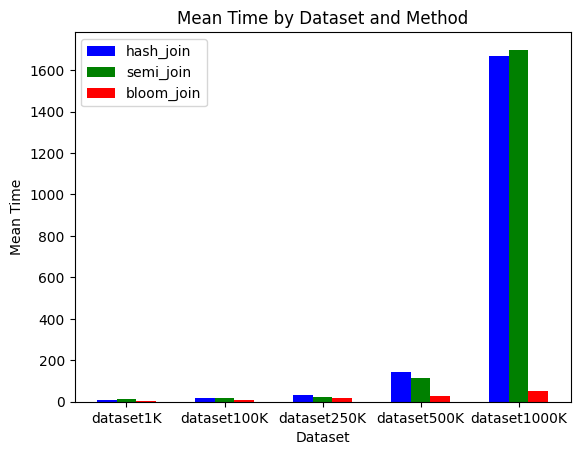

In [74]:
# Group the DataFrame by dataset and method, and calculate the mean of time for each group
threshold = 1
means = df.groupby(['dataset', 'method'])['time'].mean()

datasets = df['dataset'].unique().tolist()
methods = df['method'].unique().tolist()

# Create a dictionary to store the mean times for each method
mean_times = {method: [] for method in methods}


for dataset in datasets:
    for method in methods:
        dataset_filter = (df["method"] == method) & (df["dataset"] == dataset)
        dataset_times = df[dataset_filter]["time"]

        mean_time = dataset_times.mean()
        std_time = dataset_times.std()

        # Filter the dataframe based on the threshold
        filtered_df = df[
            dataset_filter &
            (df["time"] >= mean_time - threshold * std_time) &
            (df["time"] <= mean_time + threshold * std_time)
        ]

        # Calculate the mean of the filtered values
        filtered_mean_time = filtered_df["time"].mean()
        mean_times[method].append(filtered_mean_time)


# Set the positions for the bars and the width of the bars
bar_width = 0.2
r1 = np.arange(len(datasets))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the grouped bar plot
plt.bar(r1, mean_times['hash_join'], color='b', width=bar_width, label='hash_join')
plt.bar(r2, mean_times['semi_join'], color='g', width=bar_width, label='semi_join')
plt.bar(r3, mean_times['bloom_join'], color='r', width=bar_width, label='bloom_join')

# Set the x-axis labels, y-axis label, and plot title
plt.xlabel('Dataset')
plt.ylabel('Mean Time')
plt.xticks([r + bar_width for r in range(len(datasets))], datasets)
plt.title('Mean Time by Dataset and Method')

# Add a legend
plt.legend()

# Show the plot
plt.show()